In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('hw.csv')

In [5]:
df

,Height,Weight
0,111,11
1,112,15
2,123,17
3,124,20
4,125,25
5,134,27
6,135,29
7,145,30
8,156,32
9,156,35


Text(0.5, 0, 'Weight')

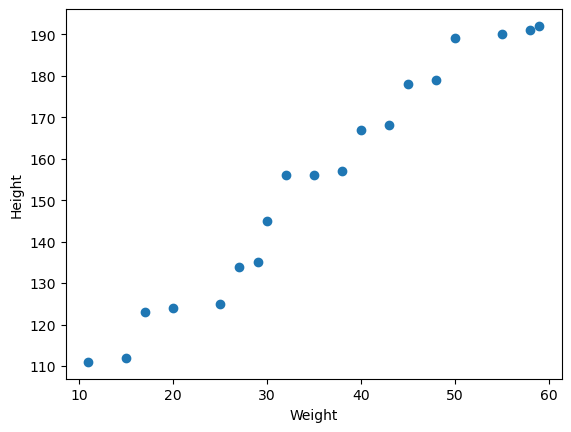

In [6]:
plt.scatter(df['Weight'],df['Height'])
plt.ylabel('Height')
plt.xlabel('Weight')

In [7]:
#Correlation
df.corr()

,Height,Weight
Height,1.000000,0.983582
Weight,0.983582,1.000000


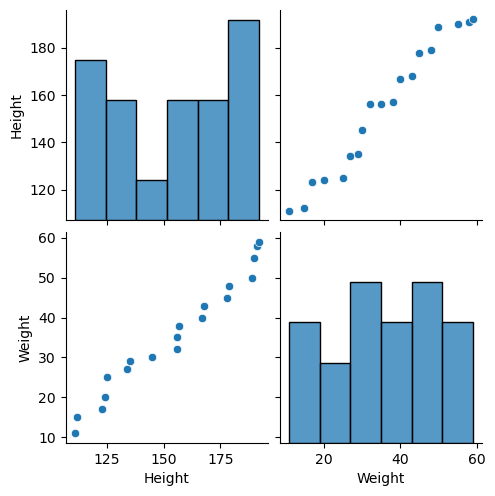

In [8]:
#Seaborn for Visualization
import seaborn as sns
sns.pairplot(df)

In [10]:
## Independent and Dependent features
x = df[['Weight']] #independent features should be dataframe or 2 dimensional
y = df['Height'] #This feature can be series or 1D array

In [15]:
from sklearn import model_selection
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,test_size = 0.25,random_state=42)
x_train,x_test,y_train,y_test

(    Weight
 16      55
 3       20
 13      45
 15      50
 17      58
 2       17
 9       35
 18      59
 4       25
 12      43
 7       30
 10      38
 14      48
 6       29,
     Weight
 0       11
 5       27
 11      40
 1       15
 8       32,
 16    190
 3     124
 13    178
 15    189
 17    191
 2     123
 9     156
 18    192
 4     125
 12    168
 7     145
 10    157
 14    179
 6     135
 Name: Height, dtype: int64,
 0     111
 5     134
 11    167
 1     112
 8     156
 Name: Height, dtype: int64)

In [16]:
x_train.shape

(14, 1)

In [20]:
##Standardization
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()
scaler.fit_transform(x_train)

array([[ 1.16353162],
       [-1.45174588],
       [ 0.41630948],
       [ 0.78992055],
       [ 1.38769826],
       [-1.67591252],
       [-0.33091266],
       [ 1.46242048],
       [-1.07813481],
       [ 0.26686505],
       [-0.70452373],
       [-0.10674602],
       [ 0.64047612],
       [-0.77924595]])

In [25]:
x_test = scaler.transform(x_test)
x_test

C:\Users\victus\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-3.10491851],
       [-3.01558396],
       [-2.94299964],
       [-3.08258487],
       [-2.98766692]])

## fit_transform fits the transformer to the data and applies the transformation, while transform only applies a previously learned transformation to new data.

### Apply Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [39]:
alg = regression.fit(x_train,y_train)

In [40]:
print("Coefficient/Slope:",alg.coef_)
print("Intercept:",alg.intercept_)

Coefficient/Slope: [1.88474248]
Intercept: 86.54443938012763


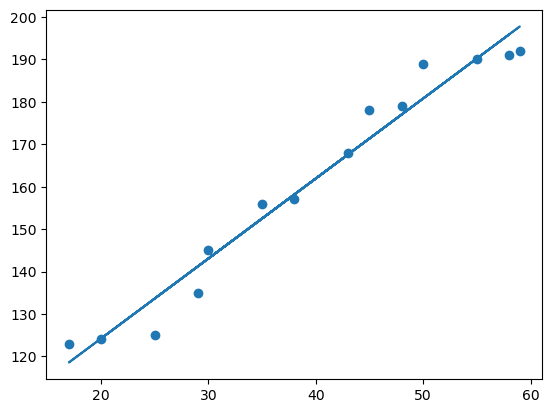

In [44]:
##Plot Best fit line w.r.t Train data
plt.scatter(x_train,y_train)
plt.plot(x_train,alg.predict(x_train))

1. Predicted height = intercept + coef(weights)
2. y_pred = 86.54443938012763 + 1.88474248(x_test)

In [48]:
## Prediction for test data
y_pred = alg.predict(x_test)


C:\Users\victus\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [52]:
## Performance Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print("MSE :",mse)
print("MAE :",mae)
print("Root Mean Squared Error :",rmse)

MSE : 3550.8477872606454
MAE : 55.160206390869384
Root Mean Squared Error : 59.588990487007294


# R square error

R-squared (R²) is a statistical measure that represents the proportion of the variance in the dependent variable (target variable) that is explained by the independent variables (features) in a regression model. It is often used as a metric to evaluate the goodness of fit of a regression model.

In [53]:
from sklearn.metrics import r2_score

In [55]:
score = r2_score(y_test,y_pred)
print("R2 Score: ",score)

R2 Score:  -5.919033100663768


In [63]:
## Prediction for new data
alg.predict(scaler.transform([[40]]))           # It means a person which has weight of 40 kg has height 86.62cm      
# Here scaler.transform([[40]]) standardize the input and predict a better prediction

C:\Users\victus\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\victus\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([86.62491488])

In [64]:
alg.predict(scaler.transform([[72]])) 

C:\Users\victus\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\victus\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([91.13154309])